In [1]:
from models import ResNet18
import os
import torch
from torch import optim, nn
from torchvision import transforms, datasets
import torchvision
import common
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
#DIRECTORY SETTINGS
os.chdir(".")#Go up two directories
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'base.pt')
IMG_NAME = 'car.jpg'

#GPU is required to enable cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print("Loading models from torchvision...")
model = ResNet18()

# Enable Parallel Data Processing if more than two gpu exist
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

model = model.to(device)
print("Done!")

Loading models from torchvision...
Done!


/home/zhifant/.conda/envs/HW1/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


automobile


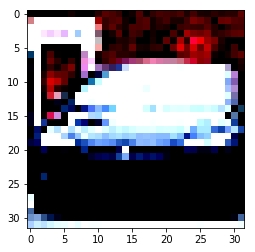

In [8]:
def image_loader(loader, image_name):
    image = Image.open(image_name)
    image = loader(image).float()
    image = torch.tensor(image, requires_grad=True)
    image = image.unsqueeze(0)
    return image

train_data = torchvision.datasets.CIFAR10(root='data', train=True, download=False, transform=None)
model = ResNet18()
infer_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

model.load_state_dict(torch.load(MODEL_SAVE_PATH)) #Load best weights from file
model = model.to(device)
model.eval()
image = image_loader(infer_transforms, IMG_NAME)
output=model(image)
predict_value,predict_idx = torch.max(output,1)
plt.imshow(image[0].permute(1,2,0).clone().detach().numpy())
print(train_data.classes[predict_idx])
